In [1]:
#pip install pmdarima

In [2]:
import numpy as np 
import pandas as pd 
import yellowbrick
from yellowbrick.text import FreqDistVisualizer


# sklearn 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA


# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

###
import logging

from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas import pivot

%matplotlib inline

## Upload Dataset

In [3]:

#Data
data_temperatures = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Temperaturas_Medianas_mensuales_del_aire_de_la_cuidad_Barcelona_desde_1780/temperaturesbarcelonadesde1780_format_long.csv')
data_rainfalls = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Precipitaciones acumuladas mensuales de la ciudad de Barcelona_desde_1786_Ciudad_servicios_Medio_ambiente/precipitacionsbarcelonadesde1786_format_long.csv')




# EDA

In [4]:
print('Training data shape Temperatures: ', data_temperatures.shape)
print('Training data shape Temperatures: ', data_rainfalls.shape)




Training data shape Temperatures:  (2880, 4)
Training data shape Temperatures:  (2808, 4)


### Temperatures Data Info

In [5]:
print ('Temperatures: \n', data_temperatures.head(10))

Temperatures: 
     Any  Mes  Desc_Mes  Temperatura
0  1780    1     Gener          6.7
1  1780    2    Febrer          7.3
2  1780    3      Març         11.6
3  1780    4     Abril         11.4
4  1780    5      Maig         16.3
5  1780    6      Juny         19.1
6  1780    7    Juliol         21.4
7  1780    8     Agost         22.0
8  1780    9  Setembre         20.3
9  1780   10   Octubre         16.3


### Rainfalls Data Info

In [6]:
print ('Rainfalls: \n', data_rainfalls.head(10))

Rainfalls: 
     Any  Mes  Desc_Mes  Precipitacions
0  1786    1     Gener            32.8
1  1786    2    Febrer            28.4
2  1786    3      Març            84.4
3  1786    4     Abril            42.3
4  1786    5      Maig             8.5
5  1786    6      Juny            38.0
6  1786    7    Juliol             6.8
7  1786    8     Agost            52.1
8  1786    9  Setembre            62.0
9  1786   10   Octubre            57.0


<h2><u>Prepare Data for Marging </u></h2>

<html>
<head>
<title></title>
</head>
<body>

<h4>Create Column with date</h4>
<p><u>Temperatures</u></p>

</body>
</html>

In [7]:
data_temperatures['dateInt']=data_temperatures['Any'].astype(str) + data_temperatures['Mes'].astype(str).str.zfill(2)

In [8]:
data_temperatures['fecha'] = pd.to_datetime(data_temperatures['dateInt'], format='%Y%m')

In [9]:
data_temperatures=data_temperatures.drop(['dateInt'], axis=1)

In [10]:
data_temperatures.head(5)

Any  Mes Desc_Mes  Temperatura      fecha
0  1780    1    Gener          6.7 1780-01-01
1  1780    2   Febrer          7.3 1780-02-01
2  1780    3     Març         11.6 1780-03-01
3  1780    4    Abril         11.4 1780-04-01
4  1780    5     Maig         16.3 1780-05-01

<p><u>Rainfalls</u></p>

In [11]:
data_rainfalls['dateInt']=data_rainfalls['Any'].astype(str) + data_rainfalls['Mes'].astype(str).str.zfill(2)

In [12]:
data_rainfalls['fecha'] = pd.to_datetime(data_rainfalls['dateInt'], format='%Y%m')

In [13]:
data_rainfalls=data_rainfalls.drop(['dateInt'], axis=1)

In [14]:
data_rainfalls.head(5)

Any  Mes Desc_Mes  Precipitacions      fecha
0  1786    1    Gener            32.8 1786-01-01
1  1786    2   Febrer            28.4 1786-02-01
2  1786    3     Març            84.4 1786-03-01
3  1786    4    Abril            42.3 1786-04-01
4  1786    5     Maig             8.5 1786-05-01

<html>
<head>
<title></title>
</head>
<body>

<h3>Merge datasets</h3>
<p><u> </u></p>

</body>
</html>

In [15]:
df_result = pd.merge(data_temperatures, data_rainfalls, on=['fecha'])

In [16]:
df_result.head()

Any_x  Mes_x Desc_Mes_x  Temperatura      fecha  Any_y  Mes_y Desc_Mes_y  \
0   1786      1      Gener          7.8 1786-01-01   1786      1      Gener   
1   1786      2     Febrer          8.3 1786-02-01   1786      2     Febrer   
2   1786      3       Març          9.9 1786-03-01   1786      3       Març   
3   1786      4      Abril         12.8 1786-04-01   1786      4      Abril   
4   1786      5       Maig         16.8 1786-05-01   1786      5       Maig   

   Precipitacions  
0            32.8  
1            28.4  
2            84.4  
3            42.3  
4             8.5

In [17]:
df_result.columns

Index(['Any_x', 'Mes_x', 'Desc_Mes_x', 'Temperatura', 'fecha', 'Any_y',
       'Mes_y', 'Desc_Mes_y', 'Precipitacions'],
      dtype='object')

In [18]:
df_result=df_result.drop(['Any_x', 'Mes_x', 'Desc_Mes_x'],axis=1)

In [19]:
df_result.columns

Index(['Temperatura', 'fecha', 'Any_y', 'Mes_y', 'Desc_Mes_y',
       'Precipitacions'],
      dtype='object')

In [20]:
df_result.columns = ['Temperatura', 'fecha', 'Año', 'Mes', 'Desc_Mes',
       'Precipitacions']
df_result = df_result[[ 'fecha', 'Año', 'Mes', 'Desc_Mes',
       'Temperatura','Precipitacions' ]]

In [21]:
df_result

fecha   Año  Mes  Desc_Mes  Temperatura  Precipitacions
0    1786-01-01  1786    1     Gener          7.8            32.8
1    1786-02-01  1786    2    Febrer          8.3            28.4
2    1786-03-01  1786    3      Març          9.9            84.4
3    1786-04-01  1786    4     Abril         12.8            42.3
4    1786-05-01  1786    5      Maig         16.8             8.5
5    1786-06-01  1786    6      Juny         20.2            38.0
6    1786-07-01  1786    7    Juliol         20.9             6.8
7    1786-08-01  1786    8     Agost         21.1            52.1
8    1786-09-01  1786    9  Setembre         19.5            62.0
9    1786-10-01  1786   10   Octubre         15.5            57.0
10   1786-11-01  1786   11  Novembre          9.2           195.8
11   1786-12-01  1786   12  Desembre          8.3           114.1
12   1787-01-01  1787    1     Gener          5.4           136.4
13   1787-02-01  1787    2    Febrer          7.8            27.4
14   1787-03-01  1787    3      Març         11.3            44.6
15   1787-04-01  1787    4     Abril         12.1            76.9
16   1787-05-01  1787    5      Maig         14.7             0.0
17   1787-06-01  1787    6      Juny         19.2            29.8
18   1787-07-01  1787    7    Juliol         21.0            34.7
19   1787-08-01  1787    8     Agost         21.8            14.9
20   1787-09-01  1787    9  Setembre         19.4           205.8
21   1787-10-01  1787   10   Octubre         15.5            12.4
22   1787-11-01  1787   11  Novembre          9.3            42.2
23   1787-12-01  1787   12  Desembre         10.8             0.0
24   1788-01-01  1788    1     Gener          6.4             9.9
25   1788-02-01  1788    2    Febrer         10.1            14.9
26   1788-03-01  1788    3      Març         10.4            32.2
27   1788-04-01  1788    4     Abril         12.5            12.4
28   1788-05-01  1788    5      Maig         17.1             7.5
29   1788-06-01  1788    6      Juny         19.2           146.3
...         ...   ...  ...       ...          ...             ...
2778 2017-07-01  2017    7    Juliol         24.2             7.2
2779 2017-08-01  2017    8     Agost         24.5            17.4
2780 2017-09-01  2017    9  Setembre         19.5            53.3
2781 2017-10-01  2017   10   Octubre         18.6           128.2
2782 2017-11-01  2017   11  Novembre         12.5            15.2
2783 2017-12-01  2017   12  Desembre          8.5             3.1
2784 2018-01-01  2018    1     Gener         10.5            63.6
2785 2018-02-01  2018    2    Febrer          6.7           104.6
2786 2018-03-01  2018    3      Març         10.8           112.5
2787 2018-04-01  2018    4     Abril         14.7            83.0
2788 2018-05-01  2018    5      Maig         17.1            30.3
2789 2018-06-01  2018    6      Juny         21.5            53.1
2790 2018-07-01  2018    7    Juliol         25.3            51.5
2791 2018-08-01  2018    8     Agost         25.8            36.5
2792 2018-09-01  2018    9  Setembre         22.5            44.4
2793 2018-10-01  2018   10   Octubre         17.0           201.9
2794 2018-11-01  2018   11  Novembre         12.4           201.8
2795 2018-12-01  2018   12  Desembre         11.1             4.8
2796 2019-01-01  2019    1     Gener          8.1            18.2
2797 2019-02-01  2019    2    Febrer         11.9             4.6
2798 2019-03-01  2019    3      Març         13.5             0.3
2799 2019-04-01  2019    4     Abril         13.4            36.2
2800 2019-05-01  2019    5      Maig         15.6           109.0
2801 2019-06-01  2019    6      Juny         21.9            19.3
2802 2019-07-01  2019    7    Juliol         25.4            75.8
2803 2019-08-01  2019    8     Agost         25.1            23.1
2804 2019-09-01  2019    9  Setembre         21.8            71.5
2805 2019-10-01  2019   10   Octubre         18.5            83.2
2806 2019-11-01  2019   11  Novembre         11.9 

<p><u> Reorder Columns </p></u>

In [22]:
#df_result = df_result[['fecha','Temperatura','Precipitacions', 'Any_y','Mes_y', 'Desc_Mes_y']]


In [23]:
df_result.head(5)

fecha   Año  Mes Desc_Mes  Temperatura  Precipitacions
0 1786-01-01  1786    1    Gener          7.8            32.8
1 1786-02-01  1786    2   Febrer          8.3            28.4
2 1786-03-01  1786    3     Març          9.9            84.4
3 1786-04-01  1786    4    Abril         12.8            42.3
4 1786-05-01  1786    5     Maig         16.8             8.5

# Overview of data

<html>
<head>
<title></title>
</head>
<body>

<h2><u>Indexing Time Series</u></h2>
<p><u> </u></p>

</body>
</html>

In [24]:
index_data = df_result.set_index('fecha')
index_data

Año  Mes  Desc_Mes  Temperatura  Precipitacions
fecha                                                       
1786-01-01  1786    1     Gener          7.8            32.8
1786-02-01  1786    2    Febrer          8.3            28.4
1786-03-01  1786    3      Març          9.9            84.4
1786-04-01  1786    4     Abril         12.8            42.3
1786-05-01  1786    5      Maig         16.8             8.5
1786-06-01  1786    6      Juny         20.2            38.0
1786-07-01  1786    7    Juliol         20.9             6.8
1786-08-01  1786    8     Agost         21.1            52.1
1786-09-01  1786    9  Setembre         19.5            62.0
1786-10-01  1786   10   Octubre         15.5            57.0
1786-11-01  1786   11  Novembre          9.2           195.8
1786-12-01  1786   12  Desembre          8.3           114.1
1787-01-01  1787    1     Gener          5.4           136.4
1787-02-01  1787    2    Febrer          7.8            27.4
1787-03-01  1787    3      Març         11.3            44.6
1787-04-01  1787    4     Abril         12.1            76.9
1787-05-01  1787    5      Maig         14.7             0.0
1787-06-01  1787    6      Juny         19.2            29.8
1787-07-01  1787    7    Juliol         21.0            34.7
1787-08-01  1787    8     Agost         21.8            14.9
1787-09-01  1787    9  Setembre         19.4           205.8
1787-10-01  1787   10   Octubre         15.5            12.4
1787-11-01  1787   11  Novembre          9.3            42.2
1787-12-01  1787   12  Desembre         10.8             0.0
1788-01-01  1788    1     Gener          6.4             9.9
1788-02-01  1788    2    Febrer         10.1            14.9
1788-03-01  1788    3      Març         10.4            32.2
1788-04-01  1788    4     Abril         12.5            12.4
1788-05-01  1788    5      Maig         17.1             7.5
1788-06-01  1788    6      Juny         19.2           146.3
...          ...  ...       ...          ...             ...
2017-07-01  2017    7    Juliol         24.2             7.2
2017-08-01  2017    8     Agost         24.5            17.4
2017-09-01  2017    9  Setembre         19.5            53.3
2017-10-01  2017   10   Octubre         18.6           128.2
2017-11-01  2017   11  Novembre         12.5            15.2
2017-12-01  2017   12  Desembre          8.5             3.1
2018-01-01  2018    1     Gener         10.5            63.6
2018-02-01  2018    2    Febrer          6.7           104.6
2018-03-01  2018    3      Març         10.8           112.5
2018-04-01  2018    4     Abril         14.7            83.0
2018-05-01  2018    5      Maig         17.1            30.3
2018-06-01  2018    6      Juny         21.5            53.1
2018-07-01  2018    7    Juliol         25.3            51.5
2018-08-01  2018    8     Agost         25.8            36.5
2018-09-01  2018    9  Setembre         22.5            44.4
2018-10-01  2018   10   Octubre         17.0           201.9
2018-11-01  2018   11  Novembre         12.4           201.8
2018-12-01  2018   12  Desembre         11.1             4.8
2019-01-01  2019    1     Gener          8.1            18.2
2019-02-01  2019    2    Febrer         11.9             4.6
2019-03-01  2019    3      Març         13.5             0.3
2019-04-01  2019    4     Abril         13.4            36.2
2019-05-01  2019    5      Maig         15.6           109.0
2019-06-01  2019    6      Juny         21.9            19.3
2019-07-01  2019    7    Juliol         25.4            75.8
2019-08-01  2019    8     Agost         25.1            23.1
2019-09-01  2019    9  Setembre         21.8            71.5
2019-10-01  2019   10   Octubre         18.5            83.2
2019-11-01  2019   11  Novembre         11.9            39.4
2019-12-01  2019   12  Desembre         11.2           119.2

[2808 rows x 5 columns]

<html>
<head>
<title></title>
</head>
<body>

<h3><u>Plotting Temperatures</u></h3>
<p><u> </u></p>

</body>
</html>

In [25]:
y_t = index_data['Temperatura']
y_r = index_data['Precipitacions']

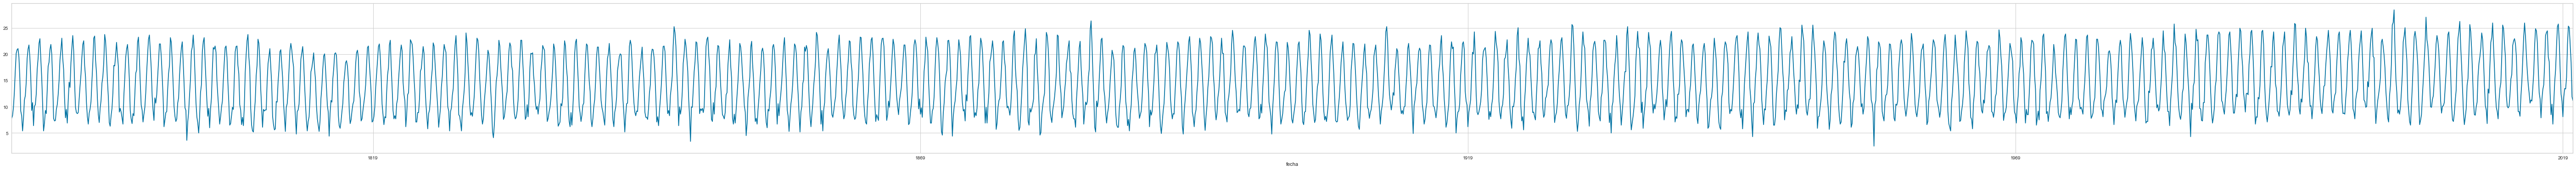

In [26]:
y_t.plot(figsize=(100, 6))
plt.show()

<html>
<head>
<title></title>
</head>
<body>

<h3><u>Plotting Rainfalls</u></h3>
<p><u> </u></p>

</body>
</html>

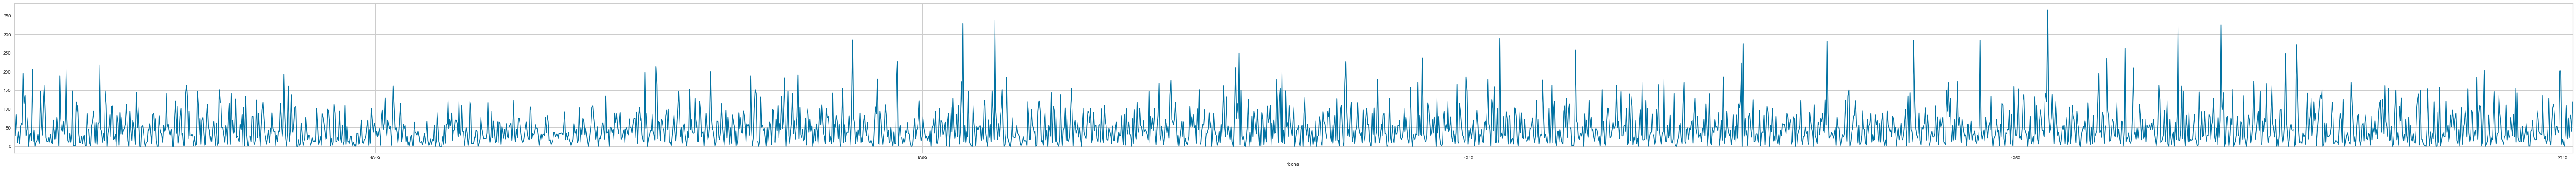

In [27]:
y_r.plot(figsize=(100, 6))
plt.show()

<html>
<head>
<title></title>
</head>
<body>

<h2><u>Now we going to analize full data.</u></h2>
<p><u>  </u></p>
<h4>Main components of a Time Series:<h4>
    <p><u> Trend </u></p>
    <p><u> seasonality </u></p>
    <p><u> Cyclicity </u></p>
    <p><u> Irregularity </u></p> 
    
</body>
</html>

<html>
<head>
<title></title>
</head>
<body>

<h2>Temperatures</h2>
<p><u>  </u></p>

</body>
</html>

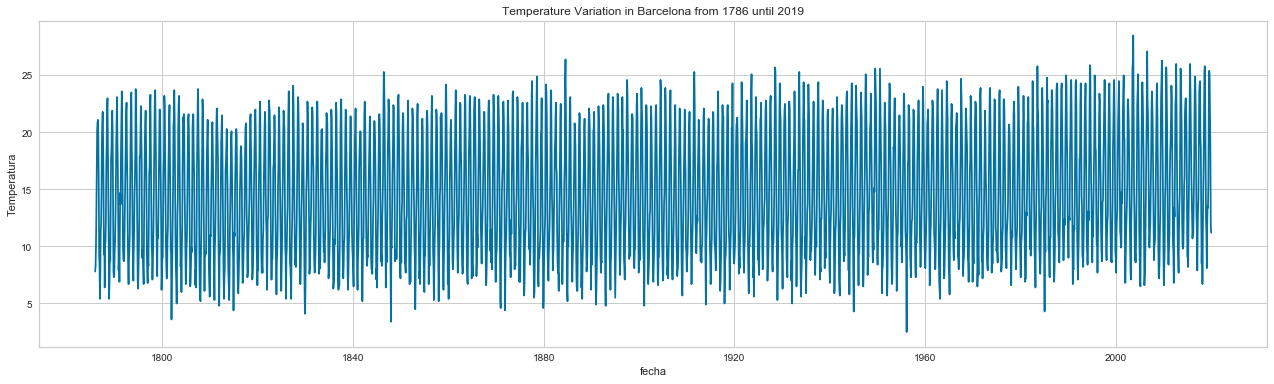

In [28]:
plt.figure(figsize=(22,6))
sns.lineplot(x=index_data.index, y=y_t)
plt.title('Temperature Variation in Barcelona from 1786 until 2019')
plt.show()

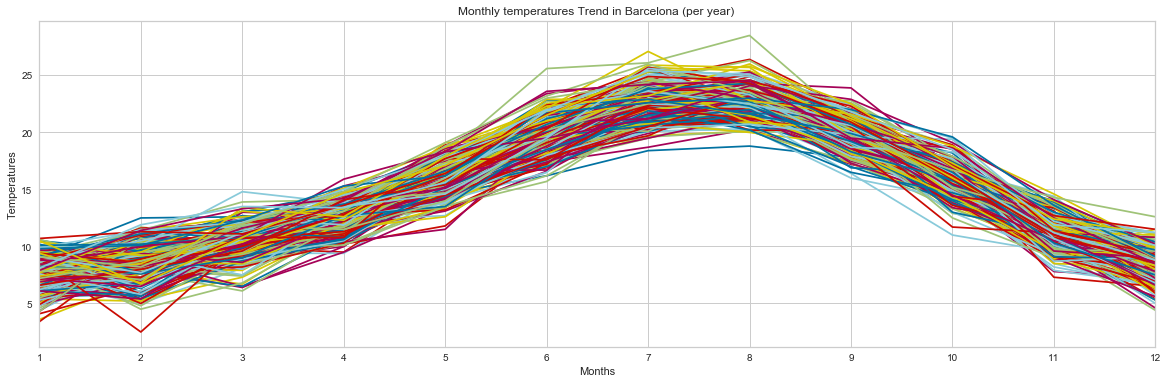

In [29]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
#data['month'] = data.index.month
#data['year'] = data.index.year
pivot_t = pd.pivot_table(index_data, values='Temperatura', index='Mes', columns='Año', aggfunc='mean')
pivot_t.plot(figsize=(20,6))
plt.title('Monthly temperatures Trend in Barcelona (per year) ')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.savefig('001_Temperature_yearly_trend_by_month_01.png')
plt.show()

# no se ve la variación
# visualizaciones dinámicas. Progresivo

In [30]:
chart_pivot_t= pd.pivot_table(index_data, index='Año', columns='Mes', values='Temperatura')
print(chart_pivot_t.head(10))
chart_pivot_t['Year'] = chart_pivot_t.index

Mes    1     2     3     4     5     6     7     8     9     10    11    12
Año                                                                        
1786  7.8   8.3   9.9  12.8  16.8  20.2  20.9  21.1  19.5  15.5   9.2   8.3
1787  5.4   7.8  11.3  12.1  14.7  19.2  21.0  21.8  19.4  15.5   9.3  10.8
1788  6.4  10.1  10.4  12.5  17.1  19.2  22.1  23.0  19.1  15.5  10.5   5.4
1789  6.9   9.3   8.7  13.3  17.7  18.5  20.9  21.9  20.0  14.7   7.8   7.3
1790  7.4   9.5  10.4  12.3  15.0  19.0  20.8  23.1  19.3  17.1  11.7   7.9
1791  9.5   6.9  11.1  14.7  13.7  18.4  21.2  23.6  20.7  14.7   9.9   8.9
1792  8.7   8.9  11.4  14.0  16.2  19.5  21.9  22.6  17.9  15.7  10.8   8.1
1793  6.7   8.8   9.6  11.0  14.9  18.4  23.1  23.5  18.9  16.5  11.6   8.5
1794  7.0   9.7  11.2  14.5  15.8  18.5  23.8  22.5  19.2  15.0  11.8   7.0
1795  6.3   8.3   9.7  12.7  17.9  17.8  19.9  22.3  19.8  17.7   9.0   9.7


In [31]:
#chart_pivot



<html>
<head>
<title></title>
</head>
<body>

<h2>Seasonality</h2>
<p> The series clearly has some seasonality, the higher temperatures are around November and February and the lower are between July and September. Just to make the things clear, I'll merge these lines into just one line, averaging the monthly levels: </p>
<u></u>
</body>
</html>

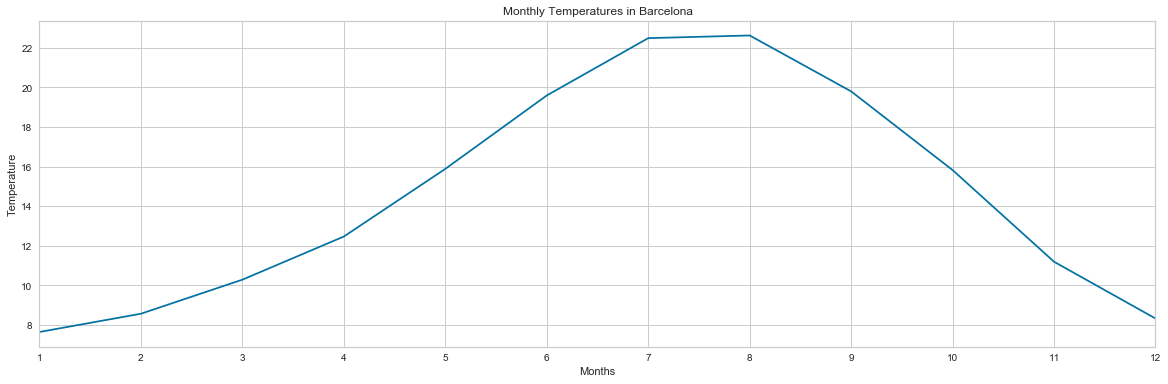

In [32]:
monthly_seasonality_t = pivot_t.mean(axis=1)
monthly_seasonality_t.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Barcelona')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.savefig('002_Final_trend_Temperature_yearly_trend_by_month.png')
plt.show()


<html>
<head>
<title></title>
</head>
<body>

<h2>Trend</h2>
<p> Now i'm going to check if there is some trend through the years in this Series: 

I do it by finding the trend during the previous 10 years and comparing it with the following years
</p>
<u></u>
</body>
</html>

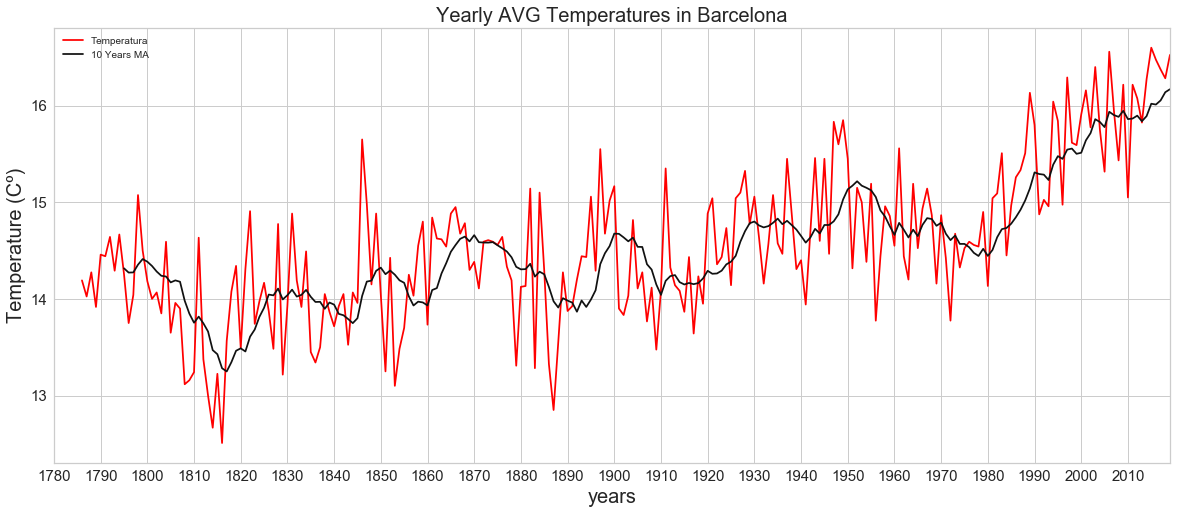

In [33]:

year_avg_t = pd.pivot_table(index_data, values='Temperatura', index='Año', aggfunc='mean')
year_avg_t['10 Years MA'] = year_avg_t['Temperatura'].rolling(10).mean()
year_avg_t[['Temperatura','10 Years MA']].plot(figsize=(20,8), color= ['red','k'] )
plt.title('Yearly AVG Temperatures in Barcelona', fontsize=20)
plt.xlabel('years', fontsize=20)
plt.ylabel('Temperature (Cº)', fontsize=20)
plt.xticks([x for x in range(1780,2019,10)], size=15)
plt.yticks(size = 15)

### save plot bigger as twice

#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')

#plt.savefig("001_Yearly_AVG_Temperatures_in_Barcelona_presentation.png", dpi = 1000)
plt.show()


# influencia de la industrializacion

<html>
<head>
<title></title>
</head>
<body>

<h6>Reminder</h6>
<p> You must apply machine learning methods during each 10-year trend to make different predictions of the future.<br />
   <u> At the same time I must look for facts in history that could have produced the change in trend since 1980</u>


</p>
<u></u>
</body>
</html>

In [34]:
year_avg_t.head(10)


Temperatura  10 Years MA
Año                           
1786    14.191667          NaN
1787    14.025000          NaN
1788    14.275000          NaN
1789    13.916667          NaN
1790    14.458333          NaN
1791    14.441667          NaN
1792    14.641667          NaN
1793    14.291667          NaN
1794    14.666667          NaN
1795    14.258333    14.316667

In [35]:
year_avg_t.tail(10)

Temperatura  10 Years MA
Año                           
2010    15.050000    15.860833
2011    16.216667    15.866667
2012    16.075000    15.896667
2013    15.825000    15.839167
2014    16.275000    15.891667
2015    16.600000    16.020000
2016    16.475000    16.011667
2017    16.375000    16.054167
2018    16.283333    16.139167
2019    16.525000    16.170000

In [36]:
## diff: resta entre Temperatura y 10 Years MA
#year_avg_t["diff"] = year_avg_t["Temperatura"] - year_avg_t["10 Years MA"]
#print (year_avg_t.head(50))
### Calculo de media por cada 10 años de la columna diff
#year_avg_t['10 Years diff'] = year_avg_t['diff'].rolling(5).mean()
#year_avg_t.tail(20)

In [37]:
### periodo de referencia
TX_01=year_avg_t[(year_avg_t.index >= 1960) & (year_avg_t.index <= 1990) ]
TX_01.Temperatura.mean()
### Añadir periodo de referencia como una columna para hacer la resta


14.837903225806448

In [38]:
index_data.Temperatura

fecha
1786-01-01     7.8
1786-02-01     8.3
1786-03-01     9.9
1786-04-01    12.8
1786-05-01    16.8
1786-06-01    20.2
1786-07-01    20.9
1786-08-01    21.1
1786-09-01    19.5
1786-10-01    15.5
1786-11-01     9.2
1786-12-01     8.3
1787-01-01     5.4
1787-02-01     7.8
1787-03-01    11.3
1787-04-01    12.1
1787-05-01    14.7
1787-06-01    19.2
1787-07-01    21.0
1787-08-01    21.8
1787-09-01    19.4
1787-10-01    15.5
1787-11-01     9.3
1787-12-01    10.8
1788-01-01     6.4
1788-02-01    10.1
1788-03-01    10.4
1788-04-01    12.5
1788-05-01    17.1
1788-06-01    19.2
              ... 
2017-07-01    24.2
2017-08-01    24.5
2017-09-01    19.5
2017-10-01    18.6
2017-11-01    12.5
2017-12-01     8.5
2018-01-01    10.5
2018-02-01     6.7
2018-03-01    10.8
2018-04-01    14.7
2018-05-01    17.1
2018-06-01    21.5
2018-07-01    25.3
2018-08-01    25.8
2018-09-01    22.5
2018-10-01    17.0
2018-11-01    12.4
2018-12-01    11.1
2019-01-01     8.1
2019-02-01    11.9
2019-03-01    13.5
2019-0

In [39]:
TX_01

Temperatura  10 Years MA
Año                           
1960    14.550000    14.662500
1961    15.558333    14.786667
1962    14.441667    14.715833
1963    14.200000    14.635833
1964    15.191667    14.716667
1965    14.525000    14.650000
1966    14.933333    14.765833
1967    15.141667    14.835833
1968    14.866667    14.826667
1969    14.158333    14.756667
1970    14.866667    14.788333
1971    14.425000    14.675000
1972    13.775000    14.608333
1973    14.675000    14.655833
1974    14.325000    14.569167
1975    14.525000    14.569167
1976    14.591667    14.535000
1977    14.558333    14.476667
1978    14.541667    14.444167
1979    14.900000    14.518333
1980    14.133333    14.445000
1981    15.041667    14.506667
1982    15.091667    14.638333
1983    15.508333    14.721667
1984    14.450000    14.734167
1985    14.966667    14.778333
1986    15.258333    14.845000
1987    15.333333    14.922500
1988    15.508333    15.019167
1989    16.133333    15.142500
1990    15.800000    15.309167

In [40]:
year_avg_t['ref_period'] = index_data.Temperatura.mean()

In [41]:
year_avg_t["diff"] = year_avg_t["Temperatura"] - year_avg_t["ref_period"]
year_avg_t.tail()

Temperatura  10 Years MA  ref_period      diff
Año                                                 
2015    16.600000    16.020000   14.561325  2.038675
2016    16.475000    16.011667   14.561325  1.913675
2017    16.375000    16.054167   14.561325  1.813675
2018    16.283333    16.139167   14.561325  1.722009
2019    16.525000    16.170000   14.561325  1.963675

In [42]:
year_avg_t.head()

Temperatura  10 Years MA  ref_period      diff
Año                                                 
1786    14.191667          NaN   14.561325 -0.369658
1787    14.025000          NaN   14.561325 -0.536325
1788    14.275000          NaN   14.561325 -0.286325
1789    13.916667          NaN   14.561325 -0.644658
1790    14.458333          NaN   14.561325 -0.102991

In [43]:
## grafica de diferencia respecto al periodo de "referencia"
year_avg_t['10 Years diff'] = year_avg_t['diff'].rolling(9).mean()
#year_avg_t[['10 Years diff','diff']].plot(figsize=(20,6))
#plt.title('Yearly AVG Temperatures in Barcelona')
#plt.xlabel('years')
#plt.ylabel('Temperature')
#plt.xticks([x for x in range(1780,2019,15)])
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
#plt.show()


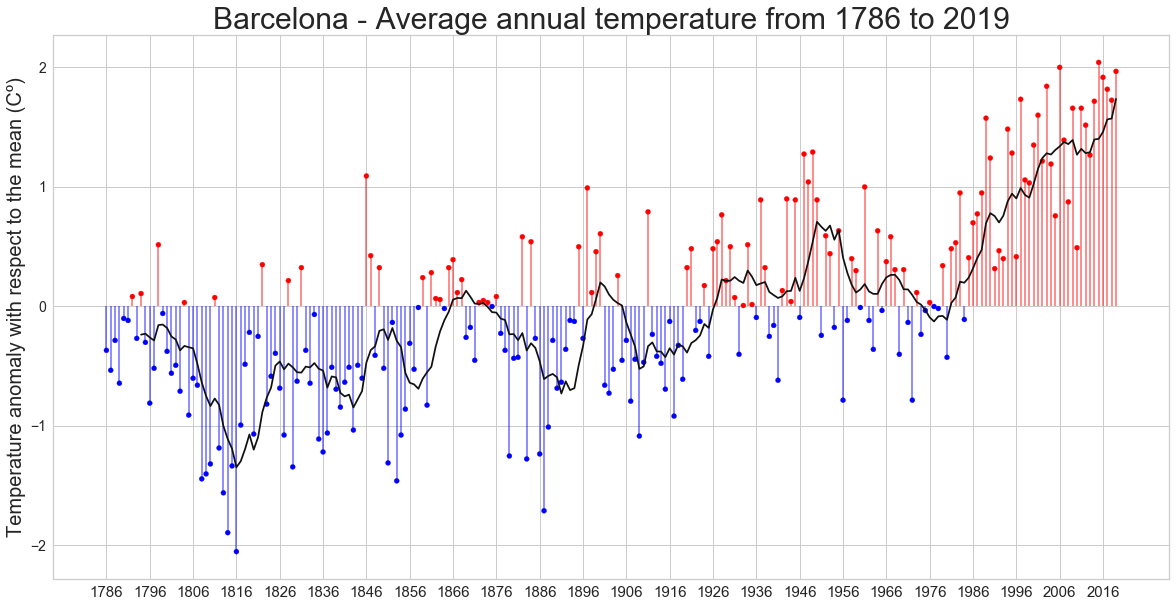

In [44]:
x = year_avg_t.index
y = year_avg_t['diff']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'red', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
plt.yticks(size = 14)
plt.plot(year_avg_t['10 Years diff'], 'k')

 
# Add title and axis names
plt.title("Barcelona - Average annual temperature from 1786 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Temperature anomaly with respect to the mean (Cº)', fontsize=20)
###
plt.savefig("002_Yearly_AVG_Temperatures_in_Barcelona__mean_presentation.png", dpi = 210)

In [45]:
## Top 10.

In [46]:

## años más calurosos
print ('años más calurosos: \n',year_avg_t.nlargest(5, ['diff'])) 

## años más frios
print ('años más frios: \n',year_avg_t.nsmallest(5, ['diff'])) 


años más calurosos: 
       Temperatura  10 Years MA  ref_period      diff  10 Years diff
Año                                                                
2015    16.600000    16.020000   14.561325  2.038675       1.398860
2006    16.558333    15.936667   14.561325  1.997009       1.335897
2019    16.525000    16.170000   14.561325  1.963675       1.733120
2016    16.475000    16.011667   14.561325  1.913675       1.457194
2003    16.400000    15.860000   14.561325  1.838675       1.278490
años más frios: 
       Temperatura  10 Years MA  ref_period      diff  10 Years diff
Año                                                                
1816    12.508333    13.282500   14.561325 -2.052991      -1.347436
1814    12.666667    13.470000   14.561325 -1.894658      -1.111325
1887    12.850000    13.975000   14.561325 -1.711325      -0.610399
1813    13.000000    13.662500   14.561325 -1.561325      -1.002066
1853    13.100000    14.250833   14.561325 -1.461325      -0.290028


In [47]:
year_avg_t.head()

Temperatura  10 Years MA  ref_period      diff  10 Years diff
Año                                                                
1786    14.191667          NaN   14.561325 -0.369658            NaN
1787    14.025000          NaN   14.561325 -0.536325            NaN
1788    14.275000          NaN   14.561325 -0.286325            NaN
1789    13.916667          NaN   14.561325 -0.644658            NaN
1790    14.458333          NaN   14.561325 -0.102991            NaN

In [48]:
## tendencias por 39 años

T_year_1=year_avg_t[(year_avg_t.index >= 1786) & (year_avg_t.index <= 1825) ]
T_year_2=year_avg_t[(year_avg_t.index >= 1825) & (year_avg_t.index <= 1864) ]
T_year_3=year_avg_t[(year_avg_t.index >= 1864) & (year_avg_t.index <= 1903) ]
T_year_4=year_avg_t[(year_avg_t.index >= 1903) & (year_avg_t.index <= 1942) ]
T_year_5=year_avg_t[(year_avg_t.index >= 1942) & (year_avg_t.index <= 1981) ]
T_year_6=year_avg_t[(year_avg_t.index >= 1981) & (year_avg_t.index <= 2019) ]



print ('1786-1825:\n',T_year_1.Temperatura.mean())
print ('1825-1864:\n',T_year_2.Temperatura.mean())
print ('1864-1903:\n',T_year_3.Temperatura.mean())
print ('1903-1942:\n',T_year_4.Temperatura.mean())
print ('1942-1981:\n',T_year_5.Temperatura.mean())
print ('1981-2019:\n',T_year_6.Temperatura.mean())

1786-1825:
 13.95583333333333
1825-1864:
 14.101041666666669
1864-1903:
 14.348125000000001
1903-1942:
 14.468750000000004
1942-1981:
 14.784999999999993
1981-2019:
 15.730128205128203


<html>
<head>
<title></title>
</head>
<body>

<h2>Seasonal analisys</h2>


<p> Made for each of the seasons of the year
<br />
   <u> </u>


</p>
<u></u>
</body>
</html>

In [49]:
global_temp = df_result[['fecha', 'Temperatura']]

global_temp['Data'] = pd.to_datetime(global_temp['fecha'])
global_temp['year'] = global_temp['fecha'].map(lambda x: x.year)
global_temp['month'] = global_temp['fecha'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['Temperatura'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['Temperatura'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['Temperatura'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['Temperatura'].mean())


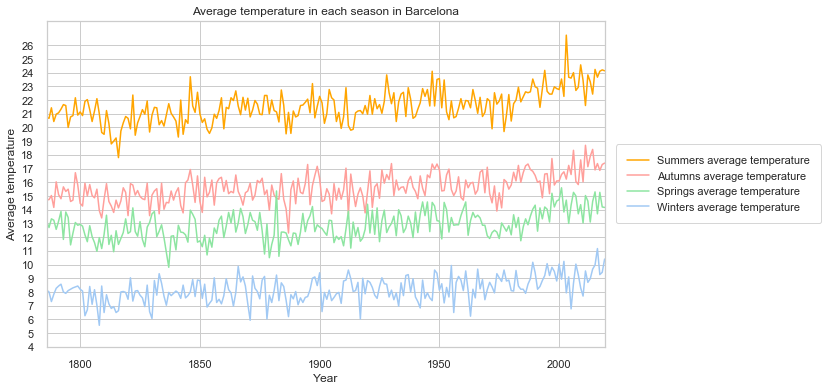

In [50]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)
plt.yticks([x for x in range(4,27,1)])

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

In [51]:
##Longitud de la lista para ver que está la media por año
len(winter_temps)

234

# Analisis de subida de temperatura por estacion

In [52]:
## los pasos seguidos aquí se repiten para todas las estaciones
## lista de años
años=year_avg_t.index.tolist()
## crear dataframes con la media de temperatura por estación enc ada año

### pirmero creo las listas con la info de las estaciones
summer_temps_t=summer_temps
autumn_temps_t=autumn_temps
spring_temps_t=spring_temps
winter_temps_t=winter_temps

# Verano

In [53]:
# dataframe verano

summer_t = pd.DataFrame(list(zip(años, summer_temps_t)), 
               columns =['year', 'temperature'])

summer_t = summer_t.set_index('year')
#print(summer_t.tail(10))

#Medias de Temperatura entre los años 1961 y 1990
TX_summer=summer_t[(summer_t.index >= 1960) & (summer_t.index <= 1990) ]

mean_summer=TX_summer.mean()
## añado la media a una columna dentro de mi nuevo datafram

summer_t['ref_period'] = mean_summer.temperature

## diferencia entre la media de referencia y otros años
summer_t["diff"] = summer_t["temperature"] - summer_t["ref_period"]

In [54]:
## dataframe final de la temperatura media por año en verano
summer_t.head()

temperature  ref_period      diff
year                                   
1786    20.733333   21.855914 -1.122581
1787    20.666667   21.855914 -1.189247
1788    21.433333   21.855914 -0.422581
1789    20.433333   21.855914 -1.422581
1790    20.966667   21.855914 -0.889247

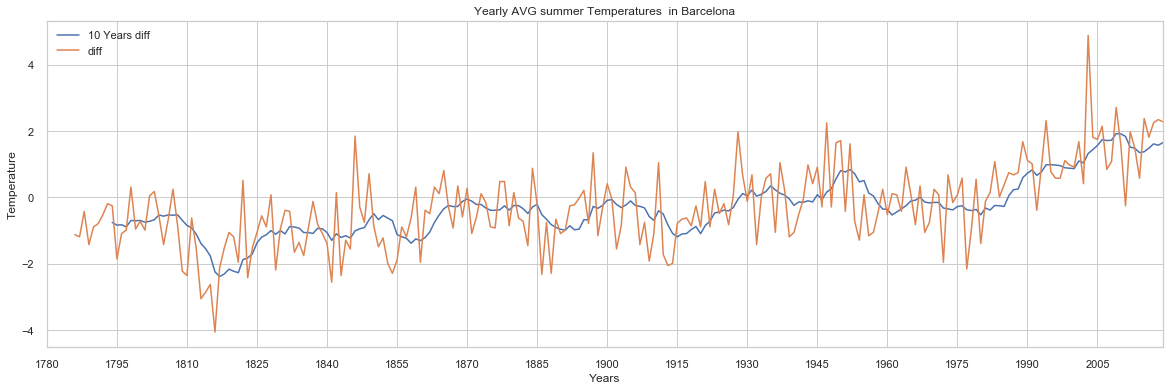

In [55]:
summer_t['10 Years diff'] = summer_t['diff'].rolling(9).mean()
summer_t[['10 Years diff','diff']].plot(figsize=(20,6))
plt.title('Yearly AVG summer Temperatures  in Barcelona')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1780,2019,15)])
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()

Text(0, 0.5, 'Summer Temperature anomaly with respect to the period 1961-1990')

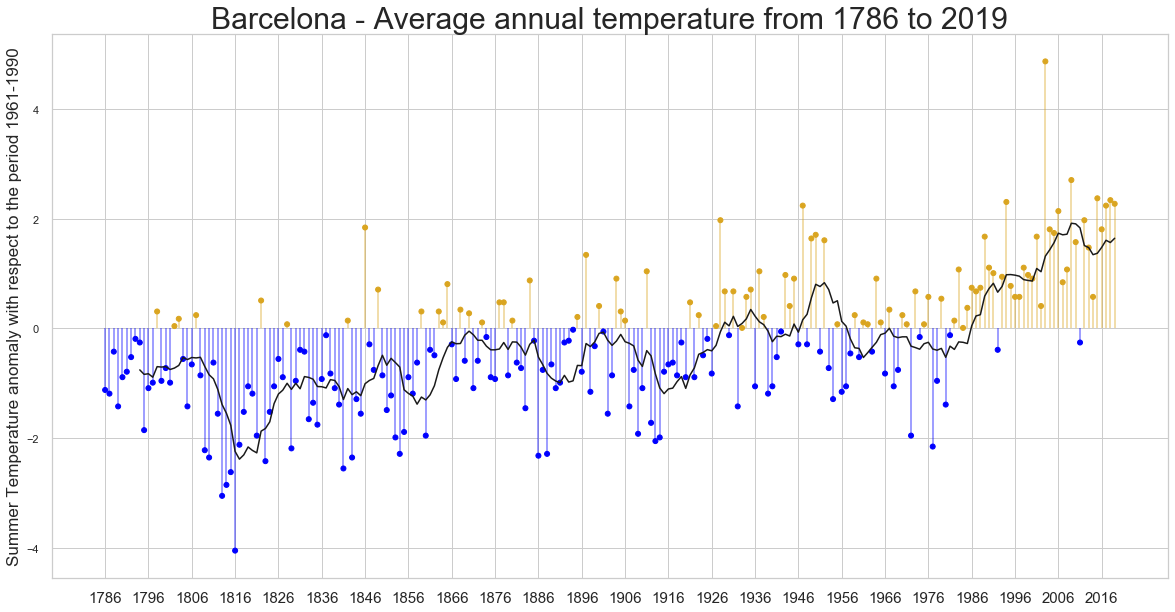

In [56]:
x = summer_t.index
y = summer_t['diff']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'goldenrod', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
plt.plot(summer_t['10 Years diff'], 'k')

 
# Add title and axis names
plt.title("Barcelona - Average annual temperature from 1786 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Summer Temperature anomaly with respect to the period 1961-1990', fontsize=17)


## Años más calurosos

In [57]:
## años más calurosos
print ('veranos más calurosos:\n',summer_t.nlargest(5, ['diff'])) 

## años más frios
print ('veranos más frios:\n',summer_t.nsmallest(5, ['diff'])) 


veranos más calurosos:
       temperature  ref_period      diff  10 Years diff
year                                                  
2003    26.733333   21.855914  4.877419       1.321864
2009    24.566667   21.855914  2.710753       1.921864
2015    24.233333   21.855914  2.377419       1.373716
2018    24.200000   21.855914  2.344086       1.570012
1994    24.166667   21.855914  2.310753       0.981123
veranos más frios:
       temperature  ref_period      diff  10 Years diff
year                                                  
1816    17.800000   21.855914 -4.055914      -2.244803
1813    18.800000   21.855914 -3.055914      -1.389247
1814    19.000000   21.855914 -2.855914      -1.548507
1815    19.233333   21.855914 -2.622581      -1.767025
1841    19.300000   21.855914 -2.555914      -1.296655


# Otoño

In [58]:
#dataframe otoño

autumn_t=pd.DataFrame(list(zip(años, autumn_temps_t)), 
               columns =['year', 'temperature'])
#print(autumn_t.tail(10))

autumn_t = autumn_t.set_index('year')
#print(summer_t.tail(10))

#Medias de Temperatura entre los años 1961 y 1990
TX_autumn=autumn_t[(autumn_t.index >= 1960) & (autumn_t.index <= 1990) ]

mean_autumn=TX_autumn.mean()
## añado la media a una columna dentro de mi nuevo datafram

autumn_t['ref_period'] = mean_autumn.temperature

## diferencia entre la media de referencia y otros años
autumn_t["diff"] = autumn_t["temperature"] - autumn_t["ref_period"]

In [59]:
## dataframe final de la temperatura media por año en verano
autumn_t.head()

temperature  ref_period      diff
year                                   
1786    14.733333   15.956989 -1.223656
1787    14.733333   15.956989 -1.223656
1788    15.033333   15.956989 -0.923656
1789    14.166667   15.956989 -1.790323
1790    16.033333   15.956989  0.076344

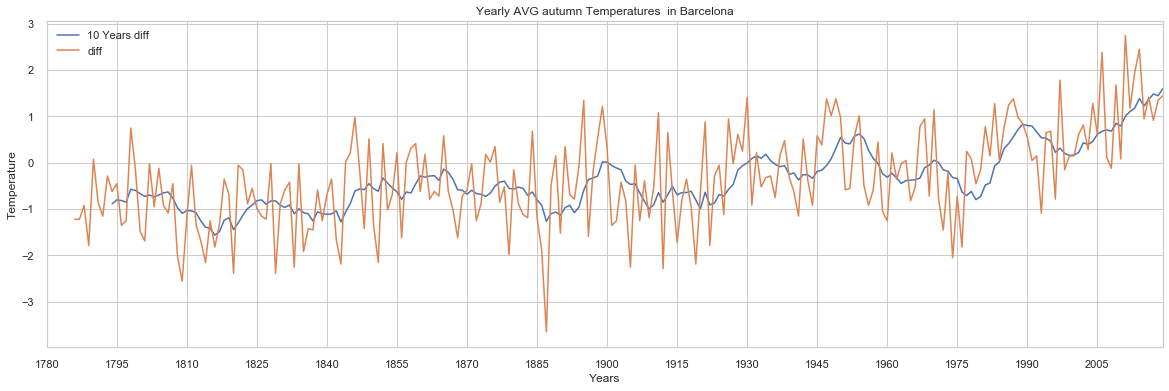

In [60]:
autumn_t['10 Years diff'] = autumn_t['diff'].rolling(9).mean()
autumn_t[['10 Years diff','diff']].plot(figsize=(20,6))
plt.title('Yearly AVG autumn Temperatures  in Barcelona')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1780,2019,15)])
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()

Text(0, 0.5, 'Autumn Temperature anomaly with respect to the period 1961-1990')

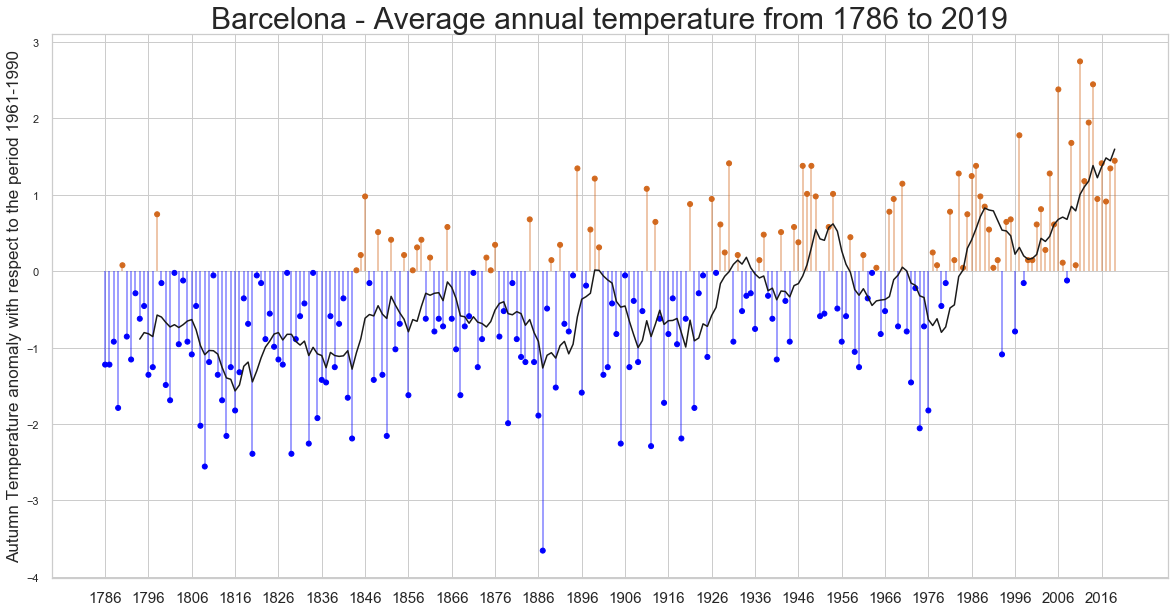

In [61]:
x = autumn_t.index
y = autumn_t['diff']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'chocolate', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
plt.plot(autumn_t['10 Years diff'], 'k')

 
# Add title and axis names
plt.title("Barcelona - Average annual temperature from 1786 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Autumn Temperature anomaly with respect to the period 1961-1990', fontsize=17)


In [62]:
## años más calurosos
print ('otoños más calurosos:\n',autumn_t.nlargest(5, ['diff'])) 

## años más frios
print ('otoños más frios:\n',autumn_t.nsmallest(5, ['diff'])) 


otoños más calurosos:
       temperature  ref_period      diff  10 Years diff
year                                                  
2011    18.700000   15.956989  2.743011       1.002270
2014    18.400000   15.956989  2.443011       1.380048
2006    18.333333   15.956989  2.376344       0.676344
2013    17.900000   15.956989  1.943011       1.176344
1997    17.733333   15.956989  1.776344       0.309677
otoños más frios:
       temperature  ref_period      diff  10 Years diff
year                                                  
1887    12.300000   15.956989 -3.656989      -1.268100
1809    13.400000   15.956989 -2.556989      -1.094026
1820    13.566667   15.956989 -2.390323      -1.449582
1829    13.566667   15.956989 -2.390323      -0.827360
1912    13.666667   15.956989 -2.290323      -0.856989


# Primavera

In [63]:
#dataframe Primavera

spring_t=pd.DataFrame(list(zip(años, spring_temps_t)), 
               columns =['year', 'temperature'])
#print(spring_t.tail(10))
spring_t = spring_t.set_index('year')
#print(summer_t.tail(10))

#Medias de Temperatura entre los años 1961 y 1990
TX_spring=spring_t[(spring_t.index >= 1960) & (spring_t.index <= 1990) ]

mean_spring=TX_spring.mean()
## añado la media a una columna dentro de mi nuevo datafram

spring_t['ref_period'] = mean_spring.temperature

## diferencia entre la media de referencia y otros años
spring_t["diff"] = spring_t["temperature"] - spring_t["ref_period"]

In [64]:
spring_t.head()

temperature  ref_period      diff
year                                   
1786    13.166667   12.987097  0.179570
1787    12.700000   12.987097 -0.287097
1788    13.333333   12.987097  0.346237
1789    13.233333   12.987097  0.246237
1790    12.566667   12.987097 -0.420430

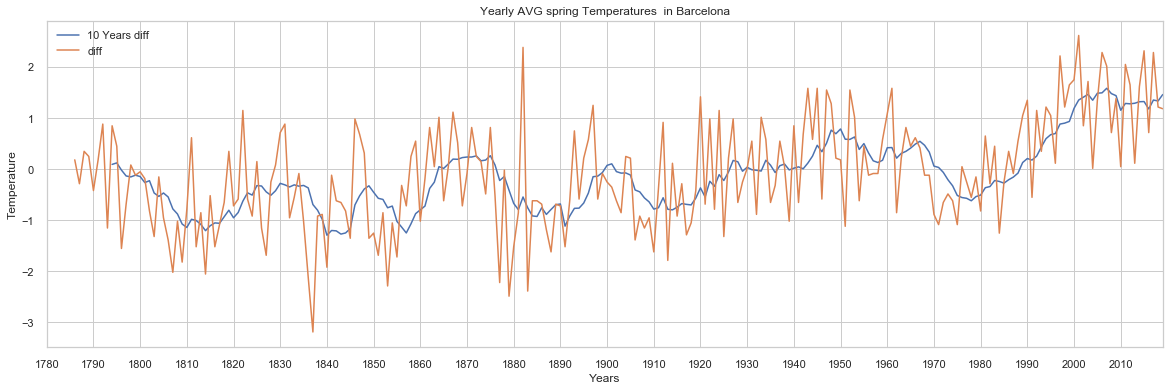

In [65]:
spring_t['10 Years diff'] = spring_t['diff'].rolling(9).mean()
spring_t[['10 Years diff','diff']].plot(figsize=(20,6))
plt.title('Yearly AVG spring Temperatures  in Barcelona')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1780,2019,10)])
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()

In [66]:
## años más calurosos
print ('otoños más calurosos:\n',spring_t.nlargest(5, ['diff'])) 

## años más frios
print ('otoños más frios:\n',spring_t.nsmallest(5, ['diff'])) 


otoños más calurosos:
       temperature  ref_period      diff  10 Years diff
year                                                  
2001    15.600000   12.987097  2.612903       1.349940
1882    15.366667   12.987097  2.379570      -0.546356
2015    15.300000   12.987097  2.312903       1.320311
2006    15.266667   12.987097  2.279570       1.490681
2017    15.266667   12.987097  2.279570       1.349940
otoños más frios:
       temperature  ref_period      diff  10 Years diff
year                                                  
1837     9.800000   12.987097 -3.187097      -0.694504
1879    10.500000   12.987097 -2.487097      -0.413023
1883    10.600000   12.987097 -2.387097      -0.757467
1853    10.700000   12.987097 -2.287097      -0.757467
1877    10.766667   12.987097 -2.220430      -0.224134


# Invierno

In [67]:
#dataframe invierno

winter_t=pd.DataFrame(list(zip(años, winter_temps_t)), 
               columns =['year', 'temperature'])
#print(winter_t.tail(10))

winter_t = winter_t.set_index('year')
#print(summer_t.tail(10))

#Medias de Temperatura entre los años 1961 y 1990
TX_winter=winter_t[(winter_t.index > 1960) & (winter_t.index < 1990) ]

mean_winter=TX_winter.mean()
## añado la media a una columna dentro de mi nuevo datafram

winter_t['ref_period'] = mean_winter.temperature

## diferencia entre la media de referencia y otros años
winter_t["diff"] = winter_t["temperature"] - winter_t["ref_period"]
winter_t.head()


temperature  ref_period      diff
year                                   
1786     8.133333    8.537931 -0.404598
1787     8.000000    8.537931 -0.537931
1788     7.300000    8.537931 -1.237931
1789     7.833333    8.537931 -0.704598
1790     8.266667    8.537931 -0.271264

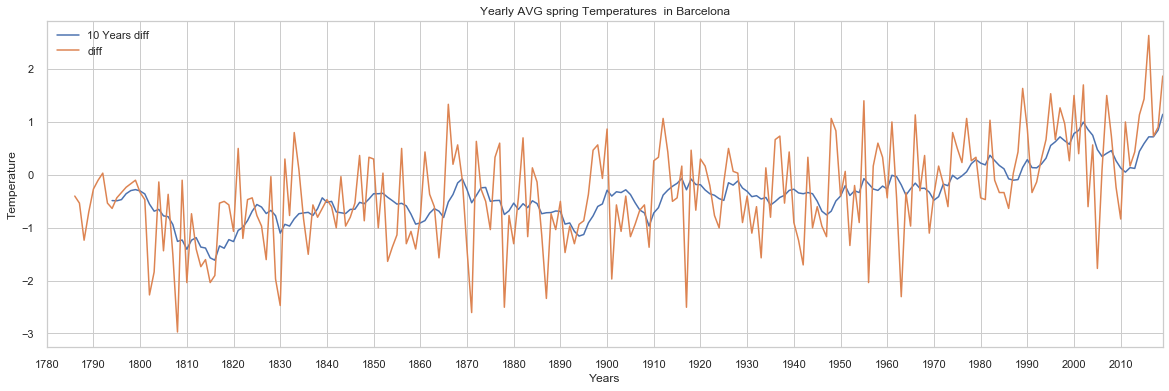

In [68]:
winter_t['10 Years diff'] = winter_t['diff'].rolling(9).mean()
winter_t[['10 Years diff','diff']].plot(figsize=(20,6))
plt.title('Yearly AVG spring Temperatures  in Barcelona')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1780,2019,10)])
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

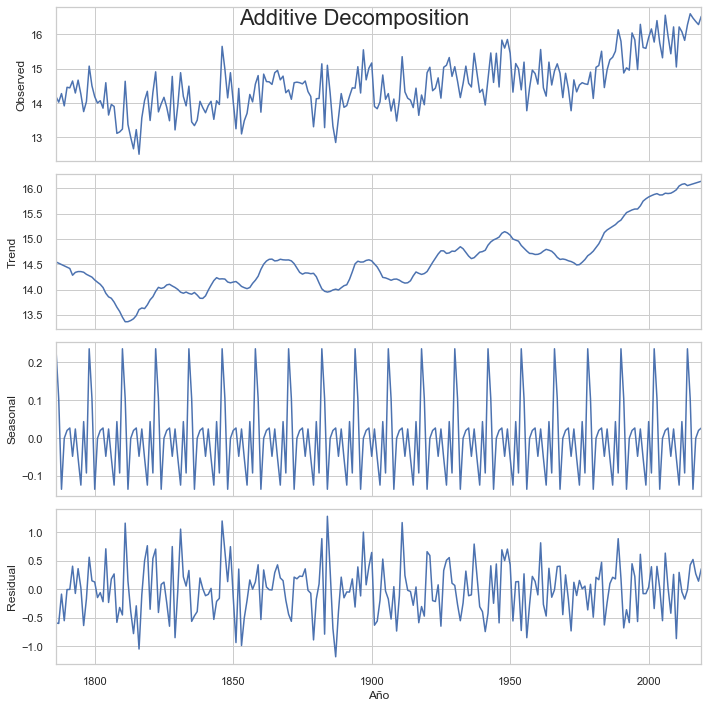

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

#additive decomposition
result_add_t = seasonal_decompose(year_avg_t.Temperatura, model='additive', extrapolate_trend = 'freq', freq=12 )

# plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_t.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show

<html>
<head>
<title></title>
</head>
<body>

<h2>Rainfalls</h2>
<p><u>  </u></p>

</body>
</html>



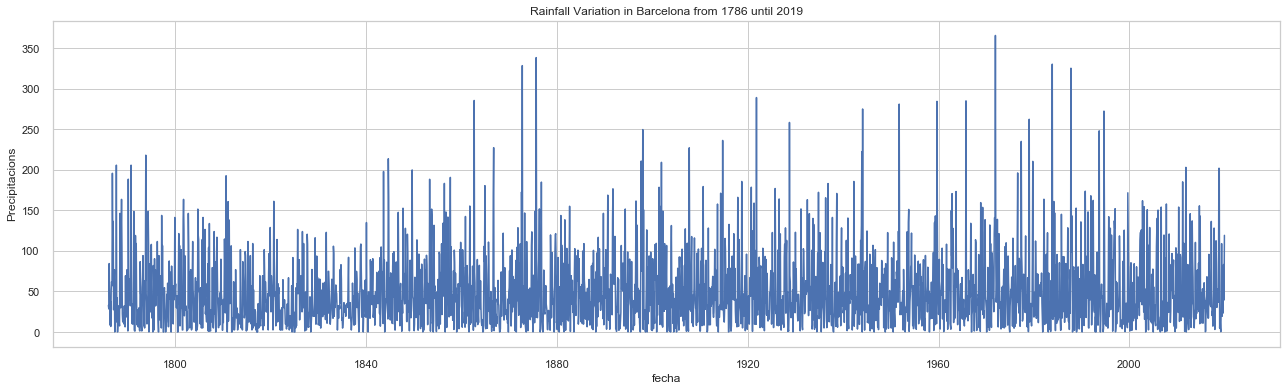

In [70]:
plt.figure(figsize=(22,6))
sns.lineplot(x=index_data.index, y=y_r)
plt.title('Rainfall Variation in Barcelona from 1786 until 2019')
plt.show()

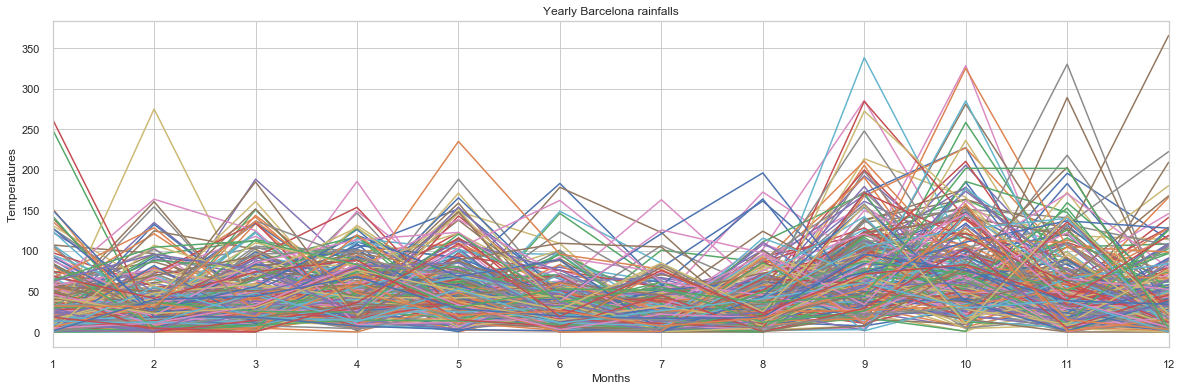

In [71]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
#data['month'] = data.index.month
#data['year'] = data.index.year
pivot_r = pd.pivot_table(index_data, values='Precipitacions', index='Mes', columns='Año', aggfunc='mean')
pivot_r.plot(figsize=(20,6))
plt.title('Yearly Barcelona rainfalls')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

# no se ve la variación
# visualizaciones dinámicas. Progresivo

In [72]:
chart_pivot_r= pd.pivot_table(index_data, index='Año', columns='Mes', values='Precipitacions')
print(chart_pivot_r.head(10))
chart_pivot_r['Year'] = chart_pivot_t.index

Mes      1     2      3     4      5      6     7     8      9      10     11  \
Año                                                                             
1786   32.8  28.4   84.4  42.3    8.5   38.0   6.8  52.1   62.0   57.0  195.8   
1787  136.4  27.4   44.6  76.9    0.0   29.8  34.7  14.9  205.8   12.4   42.2   
1788    9.9  14.9   32.2  12.4    7.5  146.3  59.4  29.8  123.9  163.6  106.6   
1789   12.4  12.4   23.6   9.9   32.2    9.9   6.3  69.4   18.7   52.1   18.7   
1790   44.6   1.2  188.5  74.4   44.7   39.7  65.7  32.3   71.9  205.8   72.0   
1791    9.9  34.7    9.9  31.1  148.8    2.5   1.2   1.2  119.0   89.2  109.1   
1792    8.7   9.9   27.4   6.3   19.9   29.8   2.5   1.2   86.8   47.1   44.7   
1793    1.2  54.6   67.0  94.2   54.6    7.5  63.2   4.9   60.8   63.3  218.1   
1794   37.3   9.9   33.5  14.9  148.8  109.1   0.0  34.7   49.7   84.3   24.8   
1795  108.0  17.4   19.9  32.3    0.0   82.0  62.1   2.5   90.4   32.3   76.9   

Mes      12  
Año          

In [73]:
#chart_pivot_r

<html>
<head>
<title></title>
</head>
<body>

<h2>Seasonality</h2>
<p> The series clearly has some seasonality, the higher temperatures are around November and February and the lower are between July and September. Just to make the things clear, I'll merge these lines into just one line, averaging the monthly levels: </p>
<u></u>
</body>
</html>

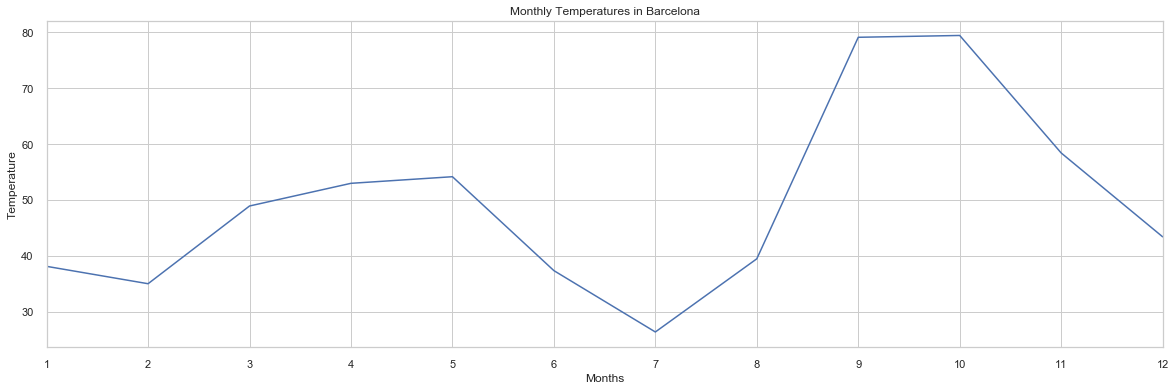

In [74]:
monthly_seasonality_r = pivot_r.mean(axis=1)
monthly_seasonality_r.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Barcelona')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

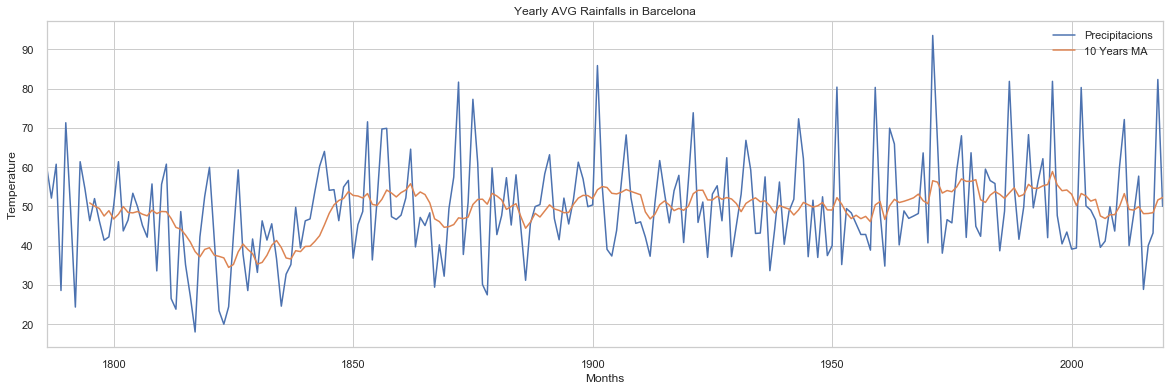

In [75]:
year_avg_r = pd.pivot_table(index_data, values='Precipitacions', index='Año', aggfunc='mean')
year_avg_r['10 Years MA'] = year_avg_r['Precipitacions'].rolling(10).mean()
year_avg_r[['Precipitacions','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Rainfalls in Barcelona')
plt.xlabel('Months')
plt.ylabel('Temperature')
#plt.xticks([x for x in range(1780,2019,10)])
#plt.grid(False)
plt.show()

#influencia de la industrializacion

In [76]:
year_avg_r.index

Int64Index([1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795,
            ...
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Año', length=234)

Text(0, 0.5, 'Rainfalls (mm/m^2)')

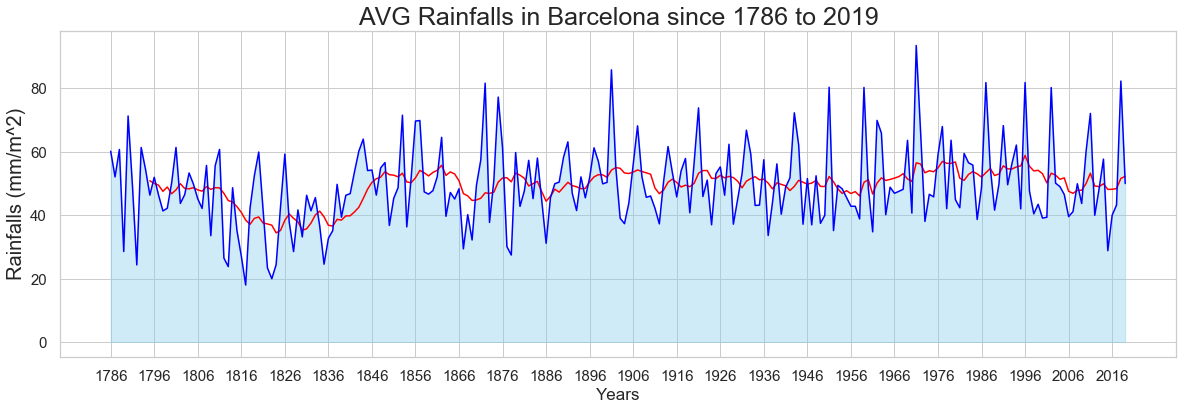

In [77]:
# get seaborn
import seaborn as sns

x= year_avg_r.index
y= year_avg_r['Precipitacions']
y_1=year_avg_r['10 Years MA']

# Make the same graph
fig= plt.figure(figsize=(20,6))
plt.fill_between( x, y, color="skyblue", alpha=0.4)
plt.plot(x, y_1, color="red")
plt.plot(x, y, color="blue")

 
# Add titles
plt.title("AVG Rainfalls in Barcelona since 1786 to 2019", loc="center", fontsize=25)
plt.xticks([x for x in range(1786,2019,10)], size=15)
plt.yticks(size=15)
plt.xlabel("Years", fontsize=17)
plt.ylabel("Rainfalls (mm/m^2)", fontsize=20)

#plt.savefig("003_Yearly_AVG_Rainfalls_in_Barcelona_presentation.png", dpi = 1000)

In [78]:
## años más calurosos
print ('Años más lluviosos:\n',year_avg_r.nlargest(10, ['Precipitacions'])) 

## años más frios
print ('Años menos lluviosos:\n',year_avg_r.nsmallest(5, ['Precipitacions'])) 


Años más lluviosos:
       Precipitacions  10 Years MA
Año                              
1971       93.558333    56.529167
1901       85.883333    54.221667
2018       82.333333    51.624167
1996       81.866667    58.870000
1987       81.858333    53.416667
1872       81.666667    47.059167
1951       80.391667    52.219167
1959       80.316667    50.363333
2002       80.291667    53.268333
1875       77.283333    50.470833
Años menos lluviosos:
       Precipitacions  10 Years MA
Año                              
1817       17.966667    38.470833
1823       19.950000    36.855000
1822       23.375000    37.237500
1813       23.775000    44.630000
1792       24.316667          NaN


In [79]:
R_year_1=year_avg_r[(year_avg_r.index >= 1786) & (year_avg_r.index <= 1825) ]
R_year_2=year_avg_r[(year_avg_r.index >= 1825) & (year_avg_r.index <= 1864) ]
R_year_3=year_avg_r[(year_avg_r.index >= 1864) & (year_avg_r.index <= 1903) ]
R_year_4=year_avg_r[(year_avg_r.index >= 1903) & (year_avg_r.index <= 1942) ]
R_year_5=year_avg_r[(year_avg_r.index >= 1942) & (year_avg_r.index <= 1981) ]
R_year_6=year_avg_r[(year_avg_r.index >= 1981) & (year_avg_r.index <= 2019) ]



print ('1786-1825:\n',R_year_1.Precipitacions.mean())
print ('1825-1864:\n',R_year_2.Precipitacions.mean())
print ('1864-1903:\n',R_year_3.Precipitacions.mean())
print ('1903-1942:\n',R_year_4.Precipitacions.mean())
print ('1942-1981:\n',R_year_5.Precipitacions.mean())
print ('1981-2019:\n',R_year_6.Precipitacions.mean())

1786-1825:
 44.35166666666669
1825-1864:
 47.67541666666667
1864-1903:
 50.150208333333325
1903-1942:
 49.84833333333333
1942-1981:
 51.771249999999995
1981-2019:
 51.875854700854696


<html>
<head>
<title></title>
</head>
<body>

<h2>Seasonal analisys</h2>


<p> Made for each of the seasons of the year
<br />
   <u> </u>


</p>
<u></u>
</body>
</html>

In [80]:
global_temp = df_result[['fecha', 'Precipitacions']]

global_temp['Data'] = pd.to_datetime(global_temp['fecha'])
global_temp['year'] = global_temp['fecha'].map(lambda x: x.year)
global_temp['month'] = global_temp['fecha'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['Precipitacions'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['Precipitacions'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['Precipitacions'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['Precipitacions'].mean())


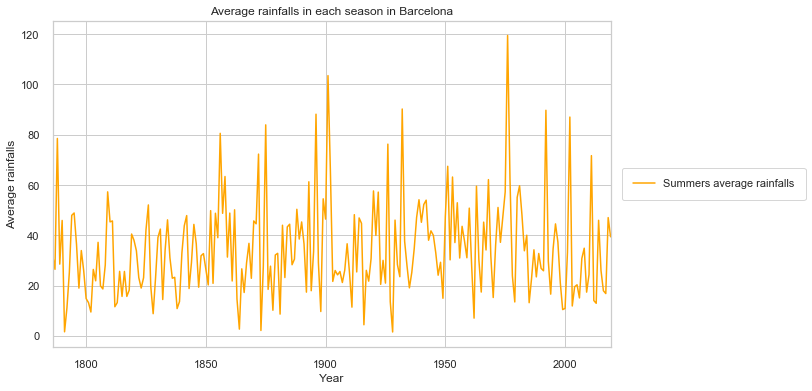

In [81]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


plt.plot(years, summer_temps, label='Summers average rainfalls', color='orange')
#plt.plot(years, autumn_temps, label='Autumns average rainfalls', color='r')
#plt.plot(years, spring_temps, label='Springs average rainfalls', color='g')
#plt.plot(years, winter_temps, label='Winters average rainfalls', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average rainfalls')
ax.set_xlabel('Year')
ax.set_title('Average rainfalls in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

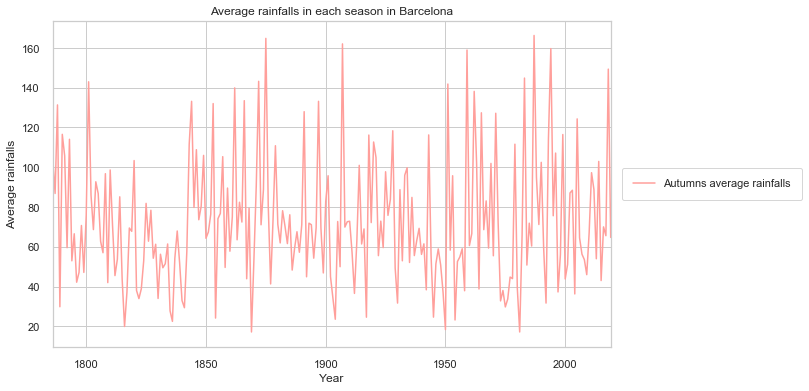

In [82]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


#plt.plot(years, summer_temps, label='Summers average rainfalls', color='orange')
plt.plot(years, autumn_temps, label='Autumns average rainfalls', color='r')
#plt.plot(years, spring_temps, label='Springs average rainfalls', color='g')
#plt.plot(years, winter_temps, label='Winters average rainfalls', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average rainfalls')
ax.set_xlabel('Year')
ax.set_title('Average rainfalls in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

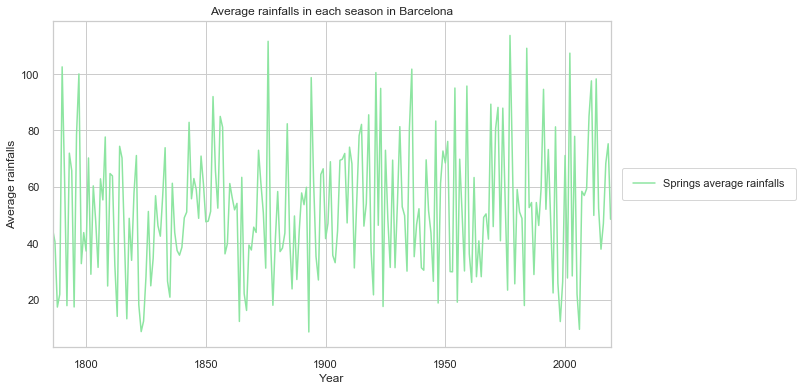

In [83]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


#plt.plot(years, summer_temps, label='Summers average rainfalls', color='orange')
#plt.plot(years, autumn_temps, label='Autumns average rainfalls', color='r')
plt.plot(years, spring_temps, label='Springs average rainfalls', color='g')
#plt.plot(years, winter_temps, label='Winters average rainfalls', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average rainfalls')
ax.set_xlabel('Year')
ax.set_title('Average rainfalls in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

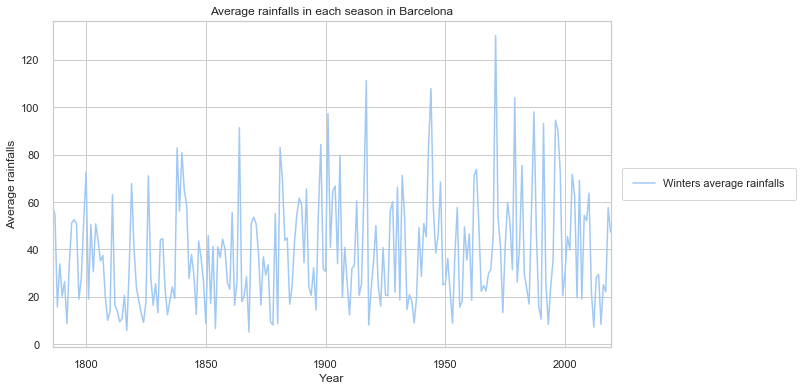

In [84]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))


#plt.plot(years, summer_temps, label='Summers average rainfalls', color='orange')
#plt.plot(years, autumn_temps, label='Autumns average rainfalls', color='r')
#plt.plot(years, spring_temps, label='Springs average rainfalls', color='g')
plt.plot(years, winter_temps, label='Winters average rainfalls', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average rainfalls')
ax.set_xlabel('Year')
ax.set_title('Average rainfalls in each season in Barcelona')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

<html>
<head>
<title></title>
</head>
<body>

<h2>Additive decomposition</h2>


<p> Trend
<br />
<p> Seasonal
<br /> 
<p> Residual: error (-1,1)
<br />     
   <u> </u>


</p>
<u></u>
</body>
</html>

In [85]:
year_avg_r.head()

Precipitacions  10 Years MA
Año                              
1786       60.183333          NaN
1787       52.091667          NaN
1788       60.733333          NaN
1789       28.541667          NaN
1790       71.308333          NaN

<function matplotlib.pyplot.show(*args, **kw)>

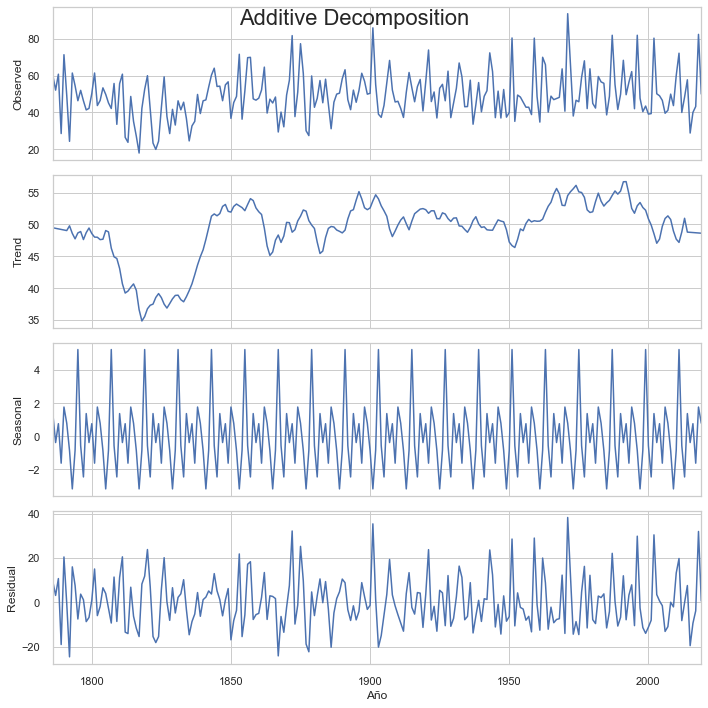

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

#additive decomposition
result_add_r = seasonal_decompose(year_avg_r.Precipitacions, model='additive', extrapolate_trend = 'freq', freq=12 )

# plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_r.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show

<html>
<head>
    
<title></title>
</head>
<body>

<h2>Anomalies</h2>
<p><u>  </u><br />
    
</p>

</body>
</html>


In [87]:
df_result.columns

Index(['fecha', 'Año', 'Mes', 'Desc_Mes', 'Temperatura', 'Precipitacions'], dtype='object')

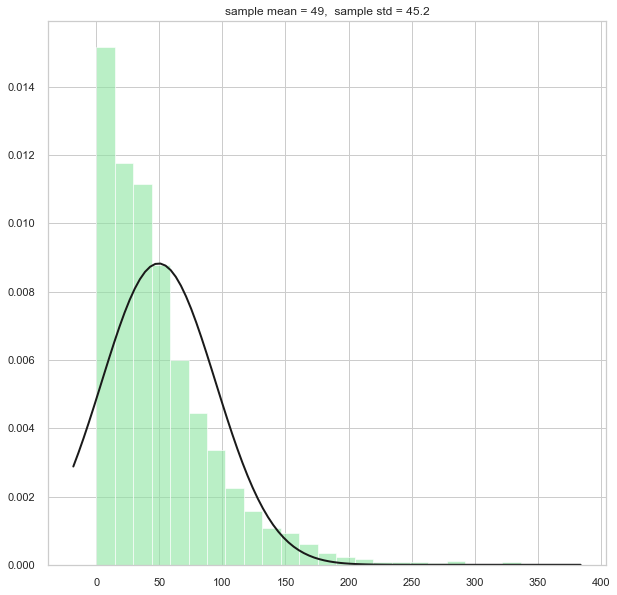

In [88]:
from scipy.stats import norm

mu, std = norm.fit(df_result.Precipitacions)
plt.hist(df_result.Precipitacions, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('sample mean = {},  sample std = {}'.format(int(round(mu, 2)), round(std, 2)))
plt.show()

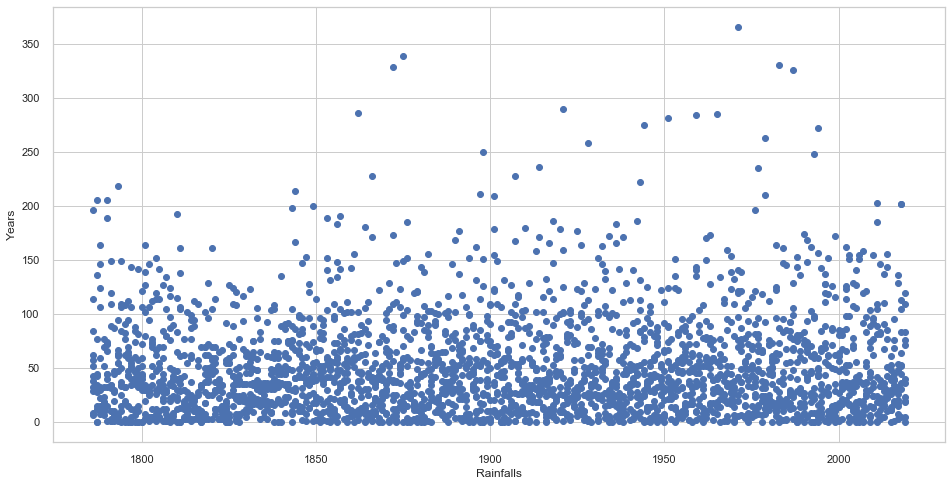

In [89]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_result.Año,df_result.Precipitacions)
ax.set_xlabel('Rainfalls')
ax.set_ylabel('Years')
plt.show()

5.56868256070665


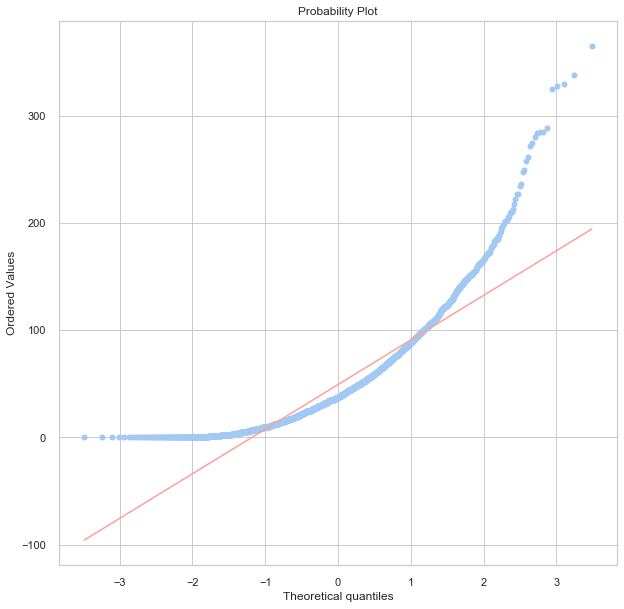

In [90]:
from scipy.stats import kurtosis 
print (kurtosis(df_result.Precipitacions))

## QQ plot
import scipy.stats as stats
import pylab
plt.figure()
stats.probplot(df_result.Precipitacions, dist="norm", plot=pylab)
pylab.show()


<html>
<head>
    
<title></title>
</head>
<body>

<h4>Anomalities</h4>
<p><u> Star to happen at the 3th quantile</u><br />
    

</body>
</html>



In [91]:
## quantiles

ptr = df_result.Precipitacions.quantile([0.25,0.5,0.75,1.0])
print(ptr)

0.25     16.700
0.50     37.500
0.75     69.125
1.00    365.800
Name: Precipitacions, dtype: float64


<html>
<head>
    
</head>
<body>
<p><u>  </u><br />
    I calculate the average temperature at which abnormal temperatures start to appear<br />
    0.75 (3th quantile) = 69.12
</p>

</body>
</html>


In [92]:
### Analisys of high temperatures

high_p=df_result.loc[df_result['Precipitacions'] > 70]

print('shape of rainfalls dataframe: \n',df_result.shape)
print('shape of high rainfalls dataframe: \n',high_p.shape)

shape of rainfalls dataframe: 
 (2808, 6)
shape of high rainfalls dataframe: 
 (680, 6)


NameError: name 'high_t' is not defined

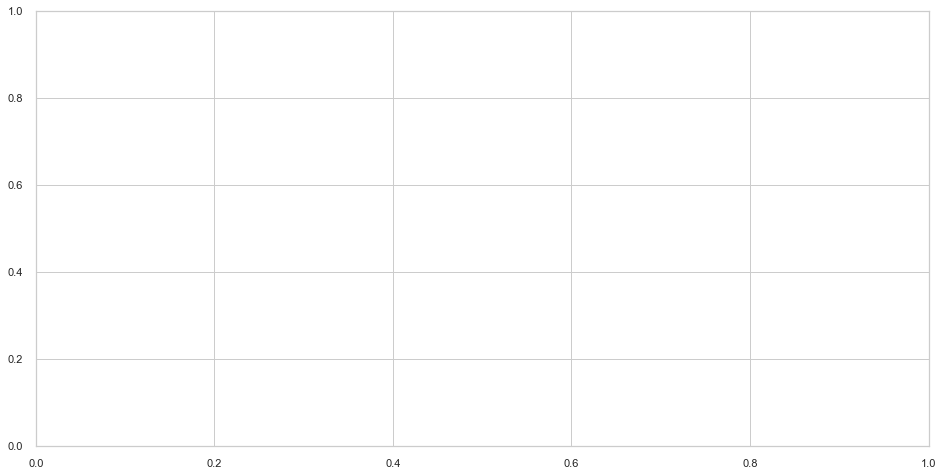

In [93]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(high_t.Año, high_t.Temperatura)
ax.set_xlabel('highest Temperatures ')
ax.set_ylabel('Years')
plt.show()

In [ ]:
## porcentage de temperatura altas por año

#high_t.Any_y.value_counts()
from scipy.stats import norm
mu, std = norm.fit(high_p.Precipitacions)
plt.hist(high_t.Precipitacions, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('sample mean = {},  sample std = {}'.format(int(round(mu, 2)), round(std, 2)))
plt.show()